# Ocorrências Aeronáuticas na Aviação Civil Brasileira

Meu projeto de Data Science consiste em extrair e manipular informações relativas a acidentes aeronáuticos ocorridos na aviação civil brasileira nos últimos 10 anos contidas nas tabelas confeccionadas pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA) ligado ao ministério da defesa. As informações são de domínio público e o dataset (conjunto de dados) se encontra no seguinte link:

http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira#

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data e horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG - Accident Investigation Section). São resguardadas a privacidade de pessoas físicas / jurídicas envolvidas conforme conforme previsto pela Lei de Acesso à Informação.

Essa base de dados é composta por informações preliminares (provenientes do formulário CENIPA-05 [Ficha de Notificação de Ocorrência Aeronáutica]) e consolidadas (provenientes dos relatórios de investigações publicados).

Dados provenientes dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Risco de Fauna, Emissões de Raio Laser e Risco Baloeiro) não constam nessa base de dados. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 tem foco principal na investigação de acidentes (AIG).

# Tabelas (Arquivos)
**oco.csv** - Informações sobre as ocorrências

**anv.csv** - Informações sobre as aeronaves envolvidas nas ocorrências

**ftc.csv** - Informações sobre os fatores contribuintes das ocorrências que tiveram as investigações finalizadas

**rec.csv** - Informações sobre as recomendações de segurança

A figura a seguir mostra o relacionamento entre as tabelas:

![title](relacionamento_tabelas.png)

In [6]:
import pandas as pd
import sklearn
import numpy as np

In [7]:
anv = pd.read_csv("anv.csv", delimiter = "~")
ftc = pd.read_csv("ftc.csv", delimiter = "~")
oco = pd.read_csv("oco.csv", delimiter = "~")
rec = pd.read_csv("rec.csv", delimiter = "~")


In [8]:
anv.head()

,codigo_ocorrencia,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fase_operacao_icao,aeronave_tipo_operacao,aeronave_nivel_dano,total_fatalidades,aeronave_dia_extracao
0,201106142171203,PPGXE,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,UNKNOWN,VOO DE INSTRUÇÃO,SUBSTANCIAL,0,2019-05-31
1,201205209591320,PTRBN,OPERADOR DE AERONAVE,AVIÃO,EMBRAER,EMB-810C,PA34,PISTÃO,BIMOTOR,2073,...,TPX,TÁXI AÉREO,****,****,APROXIMAÇÃO FINAL,APPROACH,TÁXI AÉREO,NENHUM,0,2019-05-31
2,201012015549851,PTKUK,OPERADOR DE AERONAVE,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,...,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,LANDING,TÁXI AÉREO,LEVE,0,2019-05-31
3,201708190325167,PTKUK,OPERADOR PARTICULAR,AVIÃO,TWIN COMMANDER,500-B,AC50,PISTÃO,BIMOTOR,3062,...,SAE,ESPECIALIZADA,SBCP,SBCP,CRUZEIRO,EN ROUTE,OPERAÇÃO ESPECIALIZADA,LEVE,0,2019-05-31
4,201803182255192,PPGSZ,AEROCLUBE,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PAUL,PISTÃO,MONOMOTOR,660,...,PRI,INSTRUÇÃO,SBBP,SBBP,ARREMETIDA NO SOLO,APPROACH,VOO DE INSTRUÇÃO,LEVE,0,2019-05-31


In [9]:
ftc.head()

,codigo_ocorrencia,fator_nome,fator_aspecto,fator_condicionante,fator_area,fator_detalhe_fator,fator_dia_extracao
0,200901015424167,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,"A PROVÁVEL INTENÇÃO EM PRESERVAR A AERONAVE, C...",2019-05-31
1,200901015424167,MANUTENÇÃO DE AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,O RELATÓRIO TÉCNICO DO IAE REVELOU FALHAS ORIU...,2019-05-31
2,200901015424167,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,O OPERADOR NÃO PROGRAMOU A REALIZAÇÃO DE INSPE...,2019-05-31
3,200901055963381,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,O PILOTO ERA POUCO EXPERIENTE E REALIZOU O POU...,2019-05-31
4,200901055963381,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,"A POUCA EXPERIÊNCIA DO PILOTO, ALIADA AO EXCES...",2019-05-31


Têm-se como objetivo deste trabalho extrair algumas informações estatísticas que possam ser úteis na investigação de acidentes, incidentes ou incidentes graves envolvendo aeronaves no país e que ajudem a responder a algumas questões tais como:
- Existe uma época do ano em que as ocorrências sejam mais comuns?
- Há um horário específico que possa ser mais propício à ocorrência de incidentes envolvendo aeronaves?
- Qual o fator preponderante na ocorrência de acidentes?
- Existe alguma região do país em que a proporção de acidentes é maior com relação ao número de voos ou ao número de aeronaves?
- Qual o fabricante de motores que mais apresentou problemas?

In [10]:
df = pd.merge(anv, ftc, left_on = "codigo_ocorrencia", right_on = "codigo_ocorrencia", how = "inner")

In [14]:
df = pd.merge(df, oco, left_on = "codigo_ocorrencia", right_on = "codigo_ocorrencia", how = "inner")

In [15]:
df = pd.merge(df, rec, left_on = "codigo_ocorrencia", right_on = "codigo_ocorrencia", how = "inner")

In [22]:
df["ocorrencia_dia_extracao"] = pd.to_datetime(df["ocorrencia_dia_extracao"])

In [35]:
df["ocorrencia_dia"] = pd.to_datetime(df["ocorrencia_dia"])

In [36]:
df["ocorrencia_dia_extracao"] - df["ocorrencia_dia"]

0       1303 days
1       1303 days
2       1303 days
3       1303 days
4       3089 days
5       3089 days
6       3089 days
7       3089 days
8       3768 days
9       3768 days
10      3790 days
11      3790 days
12      3790 days
13      3790 days
14      3790 days
15      3068 days
16      3068 days
17      3068 days
18      3068 days
19      3068 days
20      3068 days
21      3068 days
22      3068 days
23      1448 days
24      1448 days
25      1448 days
26      1448 days
27      1448 days
28      1448 days
29      1448 days
           ...   
12001   1308 days
12002   1308 days
12003   1308 days
12004   1125 days
12005   1125 days
12006    380 days
12007    380 days
12008    460 days
12009    460 days
12010    460 days
12011    460 days
12012   1031 days
12013   1031 days
12014   1031 days
12015   1031 days
12016   1031 days
12017   1031 days
12018   1031 days
12019   1031 days
12020    987 days
12021    987 days
12022    987 days
12023    987 days
12024    987 days
12025    9

In [23]:
df.dtypes

codigo_ocorrencia                           int64
aeronave_matricula                         object
aeronave_operador_categoria                object
aeronave_tipo_veiculo                      object
aeronave_fabricante                        object
aeronave_modelo                            object
aeronave_tipo_icao                         object
aeronave_motor_tipo                        object
aeronave_motor_quantidade                  object
aeronave_pmd                                int64
aeronave_pmd_categoria                     object
aeronave_assentos                         float64
aeronave_ano_fabricacao                   float64
aeronave_pais_fabricante                   object
aeronave_pais_registro                     object
aeronave_registro_categoria                object
aeronave_registro_segmento                 object
aeronave_voo_origem                        object
aeronave_voo_destino                       object
aeronave_fase_operacao                     object


In [37]:
df_date = df.groupby(by = [df["ocorrencia_dia"].dt.month])

In [43]:
oco_month = []
for month, tab in df_date:
    print(month,len(tab))
    oco_month.append(len(tab))

1 1217
2 1223
3 688
4 1121
5 1211
6 832
7 1224
8 1093
9 796
10 676
11 974
12 976


In [44]:
oco_month

[1217, 1223, 688, 1121, 1211, 832, 1224, 1093, 796, 676, 974, 976]

In [45]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x2ab0dcee0f0>,
 <a list of 12 Text xticklabel objects>)

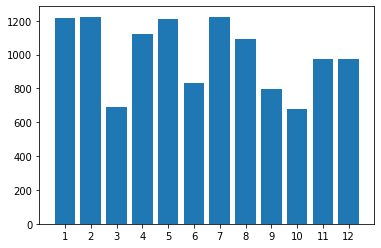

In [54]:
plt.bar([i for i in range(1,13)], oco_month)
plt.xticks([i for i in range(1,13)])

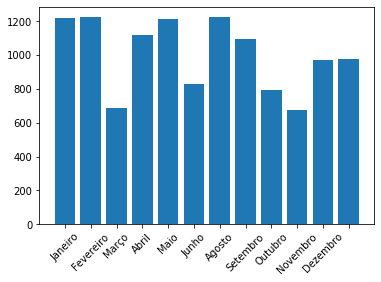

In [57]:
plt.bar([i for i in range(1,13)], oco_month)
plt.xticks([i for i in range(1,13)],['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],rotation=45)
plt.show()

In [61]:
df_num_tmp = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 

In [62]:
df_num_tmp

['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [63]:
df_num = df.select_dtypes(include = df_num_tmp)

In [64]:
df_num

,codigo_ocorrencia,aeronave_pmd,aeronave_assentos,aeronave_ano_fabricacao,total_fatalidades,ocorrencia_latitude,ocorrencia_longitude,total_recomendacoes,total_aeronaves_envolvidas
0,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1
1,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1
2,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1
3,201511054981552,660,2.0,1960.0,0,-22.9792,-46.5208,1,1
4,201012151657272,2310,6.0,1966.0,0,-5.2111,-40.7042,4,1
5,201012151657272,2310,6.0,1966.0,0,-5.2111,-40.7042,4,1
6,201012151657272,2310,6.0,1966.0,0,-5.2111,-40.7042,4,1
7,201012151657272,2310,6.0,1966.0,0,-5.2111,-40.7042,4,1
8,200902049378216,1633,6.0,1979.0,0,-2.5869,-44.2361,1,1
9,200902049378216,1633,6.0,1979.0,0,-2.5869,-44.2361,1,1
